In [2]:
import sys
print(sys.version)

3.10.8 (tags/v3.10.8:aaaf517, Oct 11 2022, 16:50:30) [MSC v.1933 64 bit (AMD64)]


In [3]:
# Basic libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

# TensorFlow & Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [4]:
import os

print("Training exists:", os.path.exists("Training"))
print("Testing exists:", os.path.exists("Testing"))
print("Training folders:", os.listdir("Training"))
print("Testing folders:", os.listdir("Testing"))

Training exists: True
Testing exists: True
Training folders: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
Testing folders: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [5]:
# Dataset paths (FIXED)
TRAIN_DIR = "Training"
TEST_DIR = "Testing"

# Image parameters
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10


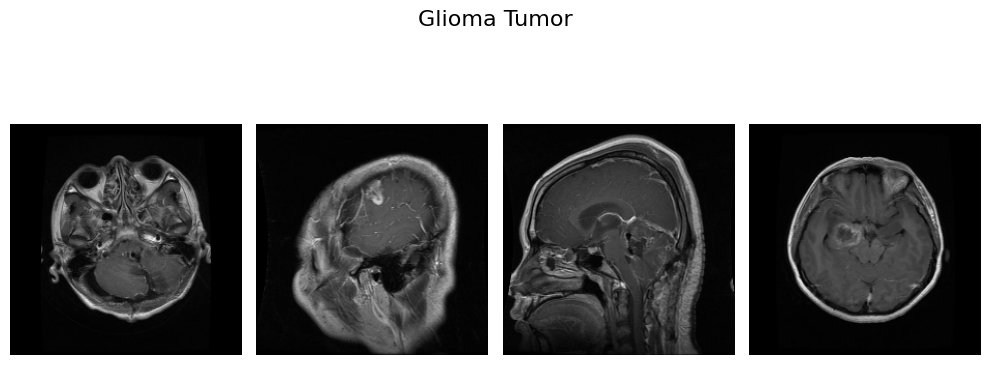

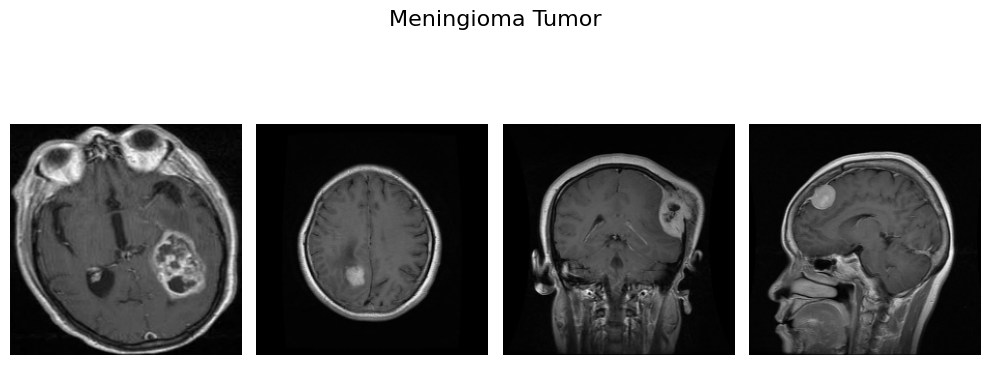

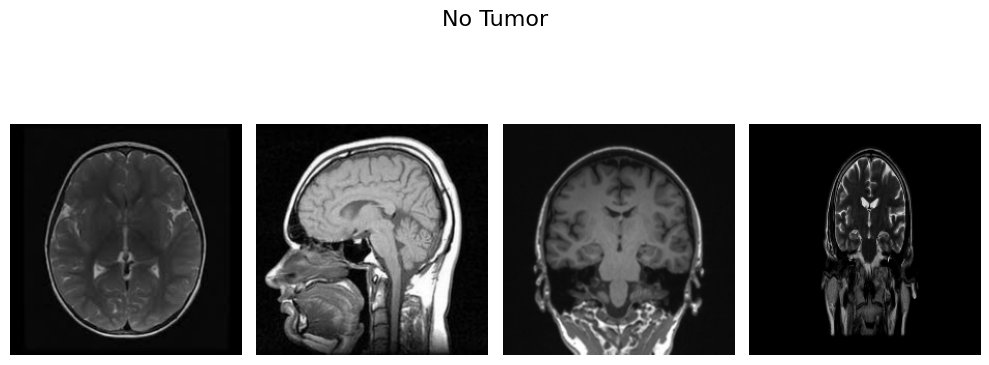

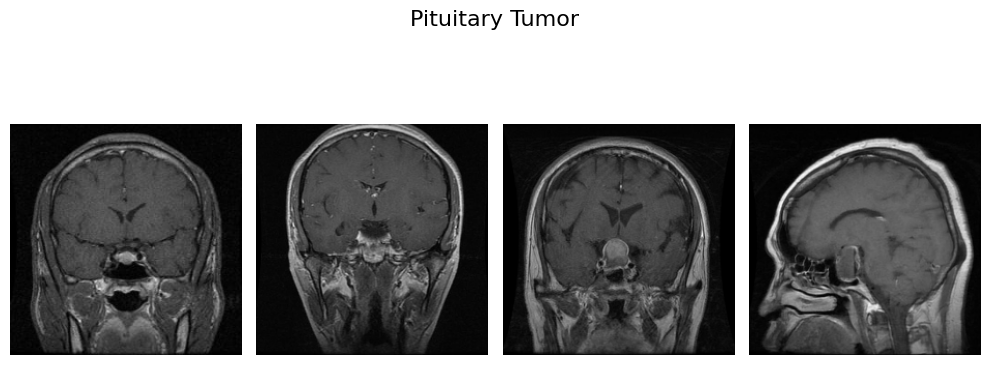

In [139]:
import random
import cv2
import os
import matplotlib.pyplot as plt

images_per_class = 4

for class_name in classes:
    class_path = os.path.join(TRAIN_DIR, class_name)
    img_names = random.sample(os.listdir(class_path), images_per_class)

    plt.figure(figsize=(10, 4))  # wide figure for horizontal layout
    plt.suptitle(class_name.replace("_", " ").title(), fontsize=16)

    for i, img_name in enumerate(img_names):
        img_path = os.path.join(class_path, img_name)

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))

        plt.subplot(1, images_per_class, i + 1)  # 1 row, 4 columns
        plt.imshow(img)
        plt.axis("off")

    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.show()


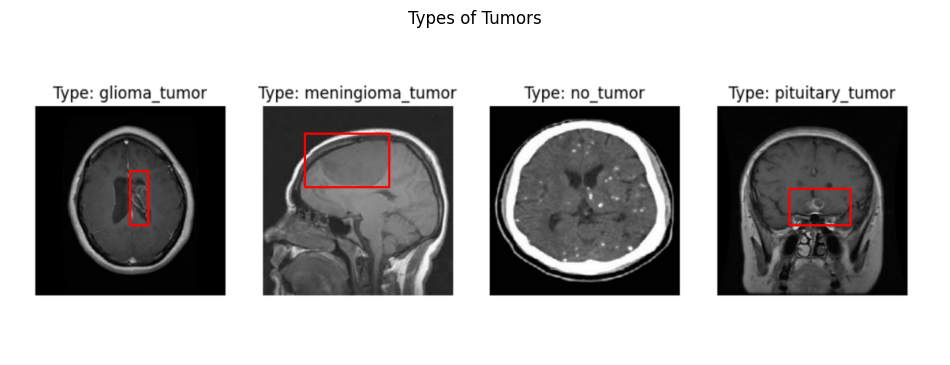

In [108]:
import cv2
import matplotlib.pyplot as plt

# Path to your local image
img_path = r"C:\Users\gamya\OneDrive\Desktop\4-2 project and thesis\types_of_tumors_ex.png"

# Load the image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct colors

# Display the image
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.title("Types of Tumors")
plt.axis("off")
plt.show()


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])


C:\Users\gamya\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=test_generator
)

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.4714 - loss: 1.1857 - val_accuracy: 0.3249 - val_loss: 1.8654
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.5714 - loss: 0.9987 - val_accuracy: 0.4442 - val_loss: 1.4954
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.6355 - loss: 0.8708 - val_accuracy: 0.3985 - val_loss: 1.7018
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 111s 1s/step - accuracy: 0.6826 - loss: 0.7569 - val_accuracy: 0.4416 - val_loss: 1.7558
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 89s 989ms/step - accuracy: 0.7122 - loss: 0.7165 - val_accuracy: 0.4721 - val_loss: 1.7811
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 90s 994ms/step - accuracy: 0.7153 - loss: 0.6918 - val_accuracy: 0.5178 - val_loss: 1.9428
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.7352 - loss: 0.6351 - val_accuracy: 0.4797 - val_loss: 2.1786
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 83s 918ms/step - accuracy: 0.7429 - loss: 0.6159 - val_accuracy: 0.53

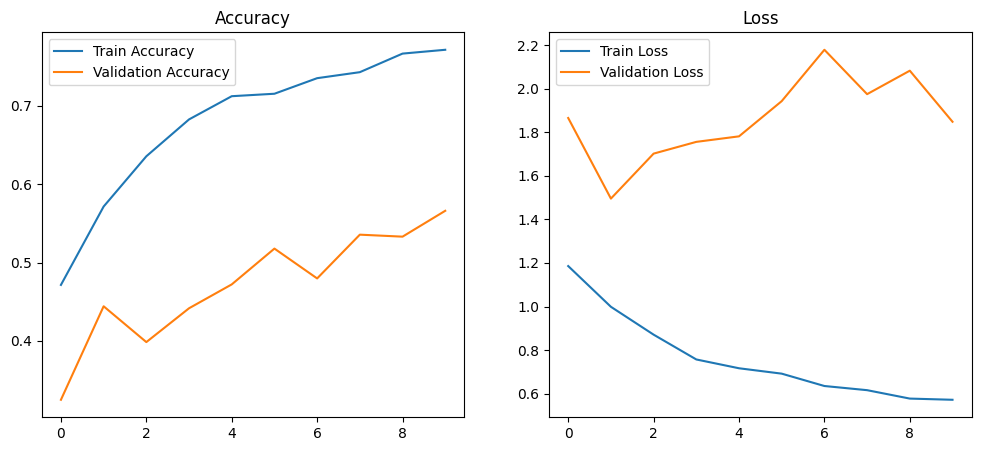

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()


In [11]:
# Class labels
class_labels = list(train_generator.class_indices.keys())
print(class_labels)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


Selected Class Folder: pituitary_tumor
Selected Image: image(97).jpg


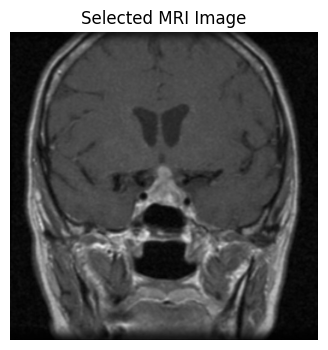

In [50]:
from tensorflow.keras.preprocessing import image
import random
import os
import matplotlib.pyplot as plt

# Path to Testing directory
TEST_DIR = "Testing"

# Get list of class folders
class_folders = os.listdir(TEST_DIR)

# Randomly choose a class folder
random_class = random.choice(class_folders)
class_path = os.path.join(TEST_DIR, random_class)

# Randomly choose an image from that class
random_image_name = random.choice(os.listdir(class_path))
img_path = os.path.join(class_path, random_image_name)

print(f"Selected Class Folder: {random_class}")
print(f"Selected Image: {random_image_name}")

# Load image for display
display_img = image.load_img(img_path)
plt.figure(figsize=(4,4))
plt.imshow(display_img)
plt.title("Selected MRI Image")
plt.axis("off")
plt.show()

# Load and preprocess image for model
img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)


In [51]:
# Predict class
predictions = model(img_array, training=False)

class_index = np.argmax(predictions[0])
confidence = predictions[0][class_index] * 100

class_labels = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]
predicted_class = class_labels[class_index]

print("Predicted Class:", predicted_class)
print(f"Confidence: {confidence:.2f}%")


Predicted Class: Pituitary
Confidence: 98.30%


In [52]:
def get_gradcam_heatmap(model, img_array, last_conv_layer_name):

    last_conv_layer = model.get_layer(last_conv_layer_name)

    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[last_conv_layer.output, model.layers[-1].output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_index = tf.argmax(predictions[0])
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)

    heatmap = tf.maximum(heatmap, 0)
    heatmap /= (tf.reduce_max(heatmap) + 1e-8)

    return heatmap.numpy()


In [53]:
# Automatically find last Conv2D layer
last_conv_layer_name = None
for layer in reversed(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

print("Using last conv layer:", last_conv_layer_name)

heatmap = get_gradcam_heatmap(model, img_array, last_conv_layer_name)


Using last conv layer: conv2d_2


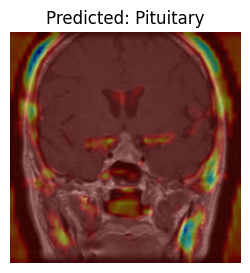

In [54]:
# Load original image
original_img = cv2.imread(img_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
original_img = cv2.resize(original_img, (IMG_SIZE, IMG_SIZE))

# Resize heatmap
heatmap_resized = cv2.resize(heatmap, (IMG_SIZE, IMG_SIZE))
heatmap_resized = np.uint8(255 * heatmap_resized)

# Apply color map
heatmap_colored = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)

# Overlay heatmap
final_img = cv2.addWeighted(original_img, 0.6, heatmap_colored, 0.4, 0)

# Display result
plt.figure(figsize=(3,3))
plt.imshow(final_img)
plt.title(f"Predicted: {predicted_class}")
plt.axis("off")
plt.show()


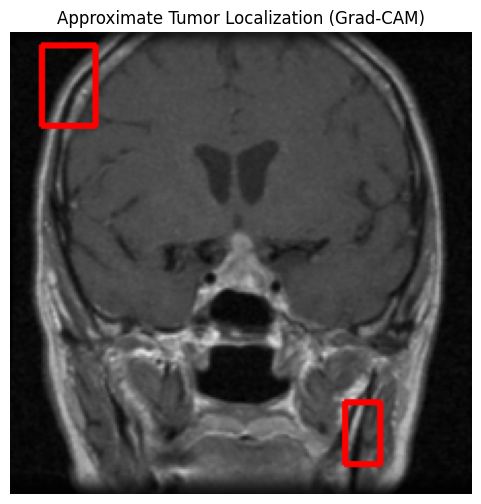

In [55]:
# Convert heatmap to binary mask
heatmap_thresh = heatmap.copy()
heatmap_thresh[heatmap_thresh < 0.6] = 0  # threshold (adjust if needed)
heatmap_thresh[heatmap_thresh >= 0.6] = 1

# Resize mask to image size
mask = cv2.resize(heatmap_thresh, (IMG_SIZE, IMG_SIZE))
mask = np.uint8(mask * 255)

# Find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copy original image
boxed_img = original_img.copy()

# Draw bounding boxes
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)

    # Ignore very small boxes (noise)
    if w * h > 500:
        cv2.rectangle(
            boxed_img,
            (x, y),
            (x + w, y + h),
            (255, 0, 0),  # RED box
            2
        )

# Display result
plt.figure(figsize=(6,6))
plt.imshow(boxed_img)
plt.title("Approximate Tumor Localization (Grad-CAM)")
plt.axis("off")
plt.show()
